<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Melika Rajabi

**Student ID**: 99101608

# Classification

In this question, we will examine classification algorithms. We do not need to implement the algorithms; instead, we will use the functions available in the `scikit-learn` library to solve the question.

## Importing Libraries

First, we import all required libraries.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Loading Data

In this question, we will use the **Breast Cancer** dataset from `scikit-learn`. You can run the following cell to load the dataset:

In [2]:
data = load_breast_cancer() # loading cancer data

X = data.data # features
Y = data.target # labels 

# Printing size of the features and targets
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


Now you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [3]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###

X_trainotest, X_val, Y_trainotest, Y_val = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X_trainotest, Y_trainotest, test_size=0.125, random_state=0)

print(X_train.shape, '\n', X_val.shape, '\n', X_test.shape)
print(Y_train.shape, '\n', Y_val.shape, '\n', Y_test.shape)

### END CODE HERE ###


(398, 30) 
 (114, 30) 
 (57, 30)
(398,) 
 (114,) 
 (57,)


## Logistic Regression

In this part of the question, you will use the `LogisticRegression` classifier to classify the data. You should change the value of `C`, which is the inverse of the regularization parameter, and find the accuracy on the validation set. Using the validation accuracy, you can find the best value for `C`. Note that you may want to change the solver for faster convergence. The `liblinear` solver is recommended for this problem. You can visit [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more information about the `LogisticRegression` classifier.

**Question**: What is the best value of `C`?

**Answer**: The best value for `C` among the values tested in the algorithm $[0.001, 0.01, 0.1, 1, 10, 100, 1000]$ is $1$. 

In [4]:
### START CODE HERE ###

# Defining function which calculates the accuracy of predictions
def accuracy(Y_true, Y_pred): 
    correct = 0
    
    for i in range(len(Y_true)):
        if Y_true[i] == Y_pred[i]:
            correct += 1
            
    acc = correct / len(Y_true)        
    return acc

# Defining the LogisticRegression classifier and its solver
logreg = LogisticRegression(solver='liblinear')
# Defining the testing values for the regularization parameter 
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

best_C = None
best_val_acc = 0

for C in C_values:

    # Determining the parameter
    logreg.C = C
    # Training the classifier with the train set
    logreg.fit(X_train, Y_train)
    
    # Validating the classifier parameter using validation set
    Y_pred = logreg.predict(X_val)
    val_acc = accuracy(Y_val, Y_pred)

    # Finding better parameter
    if val_acc > best_val_acc:
        best_C = C
        best_val_acc = val_acc

print("Best value of C: {:.3f}".format(best_C))
print("Validation accuracy with the best value of C: {:.3f}".format(best_val_acc))

### END CODE HERE ###

Best value of C: 1.000
Validation accuracy with the best value of C: 0.956


Now use your best classifier to calculate the accuracy on the test set.

**Qusetion**: What is the accuracy of this classifier on test set?

**Answer**: The accuracy of the classifier with the best parameter on the test set is $0.912$.

In [5]:
### START CODE HERE ###

# Setting the parameter to the best one
logreg.C = best_C
logreg.fit(X_train, Y_train)

# Applying it to the test set
Y_pred = logreg.predict(X_test)
test_acc = accuracy(Y_test, Y_pred)

print("Test accuracy with the best value of C: {:.3f}".format(test_acc))  
    
### END CODE HERE ###

Test accuracy with the best value of C: 0.912


For this additional part, you can use only the first two features of the dataset to classify the data and then draw the data points and the boundary on a figure. You can use the [tutorial](https://aleksandarhaber.com/solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial/?utm_source=rss&utm_medium=rss&utm_campaign=solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial) provided to learn how to do this. You may need to use additional libraries such as `matplotlib` specifically for this part.

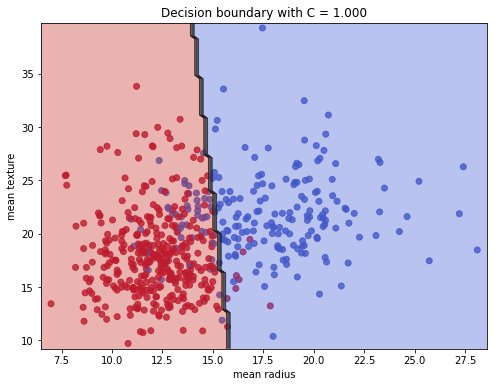

In [6]:
### START CODE HERE ###

# Importing required library
import matplotlib.pyplot as plt

# Taking two features of the data set
X_new = data.data[:, :2]

# Spliting data set into train, validation and test sets
X_trainotest, X_val_new, Y_trainotest, Y_val_new = train_test_split(X_new, Y, test_size=0.2, random_state=1)
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_trainotest, Y_trainotest, test_size=0.125, random_state=1)

# Defining the classifier and its parameter
logreg = LogisticRegression(solver='liblinear')
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000] 

best_C = None
best_val_acc = 0

for C in C_values:

    # Training the classifier
    logreg.C = C
    logreg.fit(X_train_new, Y_train_new)
    
    # Finding the best parameter based on the validation set
    Y_pred = logreg.predict(X_val_new)
    val_acc = accuracy(Y_val_new, Y_pred)

    if val_acc > best_val_acc:
        best_C = C
        best_val_acc = val_acc

# Using the best parameter on the test set
logreg.C = best_C
logreg.fit(X_train_new, Y_train_new)

Y_pred = logreg.predict(X_test_new)
test_acc = accuracy(Y_test_new, Y_pred)

# Determining the size of the figure
plt.figure(figsize=(8, 6))
# Plotting the data points (Two features representing x and y of the points and Labels representing their colors)
plt.scatter(X_new[:, 0], X_new[:, 1], c=Y, cmap='coolwarm', alpha=0.8)
# Naming the axes after the names of the features
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

# Determining the classes' positions on the plot
xx, yy = np.meshgrid(np.linspace(X_new[:, 0].min() - 0.5, X_new[:, 0].max() + 0.5, 100),
                     np.linspace(X_new[:, 1].min() - 0.5, X_new[:, 1].max() + 0.5, 100))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Determining the classes with different colors
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.4)
# Determining the line between classes 
plt.contour(xx, yy, Z, colors='black', linewidths=0.5)

# Determining the title and displaying the plot
plt.title("Decision boundary with C = {:.3f}".format(best_C))
plt.show()

### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: The accuracy of this method on the test set is $0.947$.

In [7]:
### START CODE HERE ###

# Defining the classifier and train it using the train set
clf = GaussianNB()
clf.fit(X_train, Y_train)

# Applying the classifier on the test set
Y_pred = clf.predict(X_test)
test_acc = accuracy(Y_test, Y_pred)

print("Test accuracy with the Gaussian Naive Bayes method: {:.3f}".format(test_acc))  

### END CODE HERE ###

Test accuracy with the Gaussian Naive Bayes method: 0.947


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: The accuracy of this method on the test set is $0.982$.

In [8]:
### START CODE HERE ###

# Defining the classifier and train it using the train set
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)

# Applying the classifier on the test set
Y_pred = clf.predict(X_test)
test_acc = accuracy(Y_test, Y_pred)

print("Test accuracy with the LDA method: {:.3f}".format(test_acc)) 

### END CODE HERE ###

Test accuracy with the LDA method: 0.982


## Conclusion

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: Based on the algorithms used in this question, (Logic Regression: $0.912$, Naive Bayes: $0.947$ and LDA: $0.982$), the best classifier for the breast cancer data set may be Linear Discriminant Analysis because of having the highest accuracy among others ($0.982$). Note that the parameters of these classifiers is also important in deciding.